In [1]:
import pandas
shareprice = pandas.read_excel("./data.xlsx")
shareprice = shareprice.set_index('日期')
shareprice.index = pandas.to_datetime(shareprice.index)

In [2]:
((shareprice['收盤價'] - shareprice['開盤價']) / shareprice['收盤價']) 

日期
2022-01-03    0.019017
2022-01-04    0.016768
2022-01-05   -0.029231
2022-01-06    0.009317
2022-01-07   -0.014196
                ...   
2022-09-28   -0.020548
2022-09-29   -0.018391
2022-09-30   -0.005924
2022-10-03   -0.003597
2022-10-04   -0.001166
Length: 184, dtype: float64

In [3]:
(shareprice['收盤價'] - shareprice['收盤價'].shift(1)) / shareprice['收盤價']

日期
2022-01-03         NaN
2022-01-04    0.038110
2022-01-05   -0.009231
2022-01-06   -0.009317
2022-01-07   -0.015773
                ...   
2022-09-28   -0.022831
2022-09-29   -0.006897
2022-09-30   -0.030806
2022-10-03   -0.011990
2022-10-04    0.027972
Name: 收盤價, Length: 184, dtype: float64

In [4]:
shareprice['收盤價'].mean()

540.991847826087

In [5]:
shareprice['最低價'].min()

416.5

In [6]:
shareprice['收盤價'].skew()

0.385673931205462

In [7]:
shareprice['收盤價'].kurt()

-0.7085335449071795

In [8]:
shareprice.describe()

,開盤價,最高價,最低價,收盤價
count,184.000000,184.000000,184.000000,184.000000
mean,541.160326,545.179348,537.211957,540.991848
std,61.951992,62.059842,61.618460,62.271933
min,418.500000,424.500000,416.500000,417.000000
25%,496.000000,501.750000,493.750000,497.875000
50%,525.000000,531.000000,522.500000,527.500000
75%,582.250000,586.750000,580.500000,584.500000
max,685.000000,688.000000,678.000000,683.000000


In [9]:
(shareprice['收盤價'] - shareprice['開盤價']).sum()

-31.0

In [10]:
(shareprice['收盤價'] - shareprice['開盤價']).cumsum()

日期
2022-01-03    12.0
2022-01-04    23.0
2022-01-05     4.0
2022-01-06    10.0
2022-01-07     1.0
              ... 
2022-09-28   -18.5
2022-09-29   -26.5
2022-09-30   -29.0
2022-10-03   -30.5
2022-10-04   -31.0
Length: 184, dtype: float64

In [11]:
shareprice['當沖損益'] = (shareprice['收盤價'] - shareprice['開盤價'])

In [12]:
shareprice['當沖累計損益'] = shareprice['當沖損益'].cumsum()

In [13]:
shareprice

,開盤價,最高價,最低價,收盤價,當沖損益,當沖累計損益
日期,,,,,,
2022-01-03,619.0,632.0,618.0,631.0,12.0,12.0
2022-01-04,645.0,656.0,644.0,656.0,11.0,23.0
2022-01-05,669.0,669.0,646.0,650.0,-19.0,4.0
2022-01-06,638.0,646.0,636.0,644.0,6.0,10.0
2022-01-07,643.0,646.0,632.0,634.0,-9.0,1.0
...,...,...,...,...,...,...
2022-09-28,447.0,449.0,438.0,438.0,-9.0,-18.5
2022-09-29,443.0,443.5,432.0,435.0,-8.0,-26.5
2022-09-30,424.5,427.5,422.0,422.0,-2.5,-29.0


In [14]:
shareprice.loc['2022-1-6','當沖損益'] = 123

In [16]:
shareprice

,開盤價,最高價,最低價,收盤價,當沖損益,當沖累計損益
日期,,,,,,
2022-01-03,619.0,632.0,618.0,631.0,12.0,12.0
2022-01-04,645.0,656.0,644.0,656.0,11.0,23.0
2022-01-05,669.0,669.0,646.0,650.0,-19.0,4.0
2022-01-06,638.0,646.0,636.0,644.0,123.0,10.0
2022-01-07,643.0,646.0,632.0,634.0,-9.0,1.0
...,...,...,...,...,...,...
2022-09-28,447.0,449.0,438.0,438.0,-9.0,-18.5
2022-09-29,443.0,443.5,432.0,435.0,-8.0,-26.5
2022-09-30,424.5,427.5,422.0,422.0,-2.5,-29.0


In [17]:
shareprice = shareprice.drop(columns=['最高價'])

In [18]:
shareprice

,開盤價,最低價,收盤價,當沖損益,當沖累計損益
日期,,,,,
2022-01-03,619.0,618.0,631.0,12.0,12.0
2022-01-04,645.0,644.0,656.0,11.0,23.0
2022-01-05,669.0,646.0,650.0,-19.0,4.0
2022-01-06,638.0,636.0,644.0,123.0,10.0
2022-01-07,643.0,632.0,634.0,-9.0,1.0
...,...,...,...,...,...
2022-09-28,447.0,438.0,438.0,-9.0,-18.5
2022-09-29,443.0,432.0,435.0,-8.0,-26.5
2022-09-30,424.5,422.0,422.0,-2.5,-29.0


In [19]:
shareprice = shareprice.drop(index=[shareprice.index[0]])

In [20]:
shareprice

,開盤價,最低價,收盤價,當沖損益,當沖累計損益
日期,,,,,
2022-01-04,645.0,644.0,656.0,11.0,23.0
2022-01-05,669.0,646.0,650.0,-19.0,4.0
2022-01-06,638.0,636.0,644.0,123.0,10.0
2022-01-07,643.0,632.0,634.0,-9.0,1.0
2022-01-10,628.0,627.0,643.0,15.0,16.0
...,...,...,...,...,...
2022-09-28,447.0,438.0,438.0,-9.0,-18.5
2022-09-29,443.0,432.0,435.0,-8.0,-26.5
2022-09-30,424.5,422.0,422.0,-2.5,-29.0


In [21]:
shareprice['後減前'] = shareprice['收盤價'].diff()

In [22]:
shareprice

,開盤價,最低價,收盤價,當沖損益,當沖累計損益,後減前
日期,,,,,,
2022-01-04,645.0,644.0,656.0,11.0,23.0,NaN
2022-01-05,669.0,646.0,650.0,-19.0,4.0,-6.0
2022-01-06,638.0,636.0,644.0,123.0,10.0,-6.0
2022-01-07,643.0,632.0,634.0,-9.0,1.0,-10.0
2022-01-10,628.0,627.0,643.0,15.0,16.0,9.0
...,...,...,...,...,...,...
2022-09-28,447.0,438.0,438.0,-9.0,-18.5,-10.0
2022-09-29,443.0,432.0,435.0,-8.0,-26.5,-3.0
2022-09-30,424.5,422.0,422.0,-2.5,-29.0,-13.0


<AxesSubplot:xlabel='日期'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


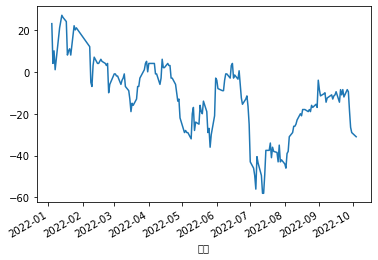

In [25]:
shareprice['當沖累計損益'].plot()

<AxesSubplot:xlabel='日期'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


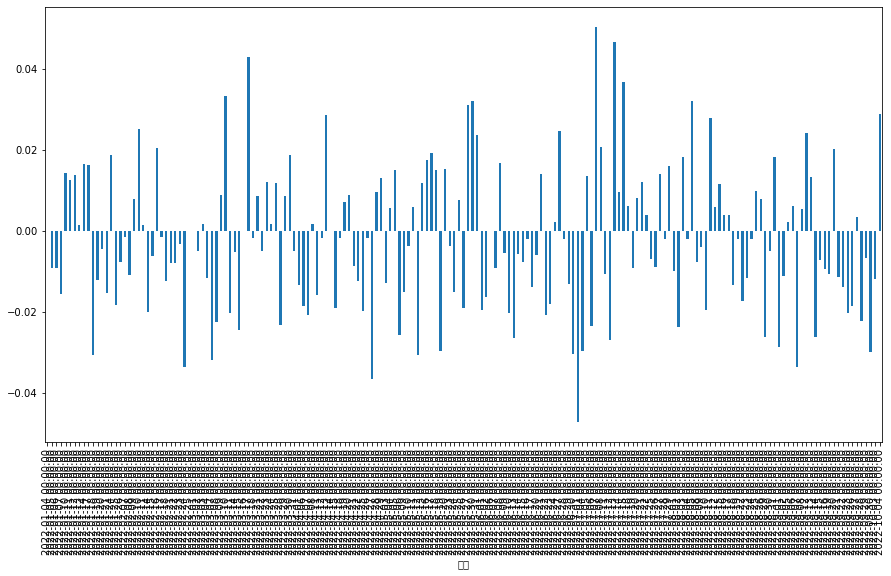

In [26]:
shareprice['收盤價'].pct_change().plot(kind='bar',figsize=[15,8])